In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

📊 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   model                16 non-null     object 
 1   num_parameters       16 non-null     float64
 2   num_requests         16 non-null     int64  
 3   qps                  16 non-null     float64
 4   mfu_weighted_mean    16 non-null     float64
 5   average_power_watts  16 non-null     float64
 6   total_energy_kwh     16 non-null     float64
 7   execution_time_s     16 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ KB
None

🧐 First 5 Rows:
                        model  num_parameters  num_requests   qps  \
0  meta-llama/Meta-Llama-3-8B    8.000000e+09         16384  0.10   
1  meta-llama/Meta-Llama-3-8B    8.000000e+09         16384  0.14   
2  meta-llama/Meta-Llama-3-8B    8.000000e+09         16384  0.19   
3  meta-llama/Meta

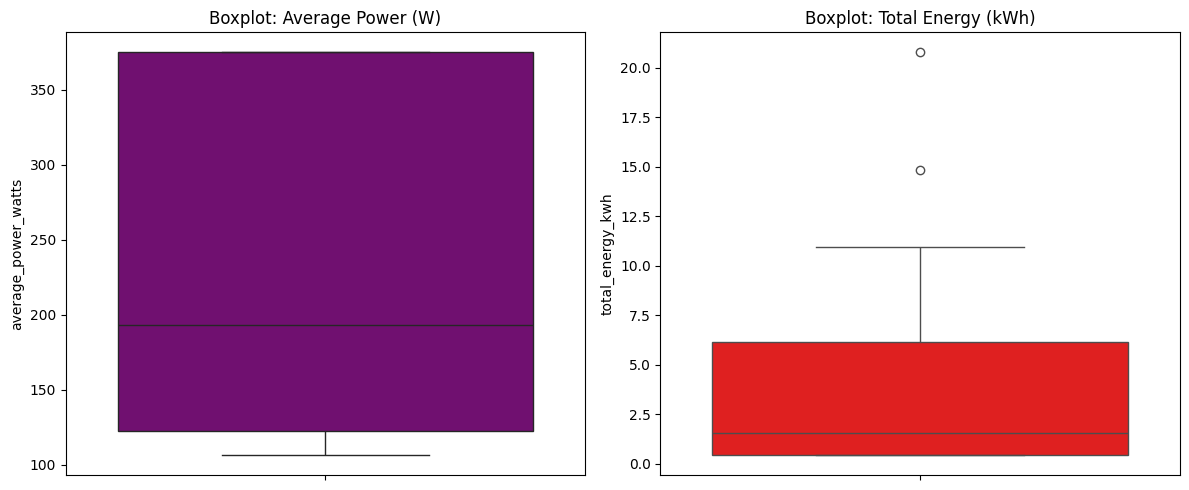

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# -----------------------------
# 0️⃣ Load Dataset
# -----------------------------
file_path = "/Users/mirayozcan/Desktop/vidur_copy/vidur/simulator_output/exp4-qps-power-energy/experiment_results_summary.csv"
df = pd.read_csv(file_path)

# -----------------------------
# 1️⃣ Dataset Overview
# -----------------------------
print("📊 Dataset Overview:")
print(df.info())

print("\n🧐 First 5 Rows:")
print(df.head())

print("\n📊 Summary Statistics:")
with pd.option_context('display.max_columns', None):
    print(df.describe())

# -----------------------------
# 2️⃣ Missing Values Check
# -----------------------------
missing_values = df.isnull().sum()
print("\n❗ Missing Values Count:")
print(missing_values[missing_values > 0])

# -----------------------------
# 3️⃣ Boxplots: Outlier Detection
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(ax=axes[0], y=df["average_power_watts"], color="purple")
axes[0].set_title("Boxplot: Average Power (W)")

sns.boxplot(ax=axes[1], y=df["total_energy_kwh"], color="red")
axes[1].set_title("Boxplot: Total Energy (kWh)")

plt.tight_layout()
plt.show()

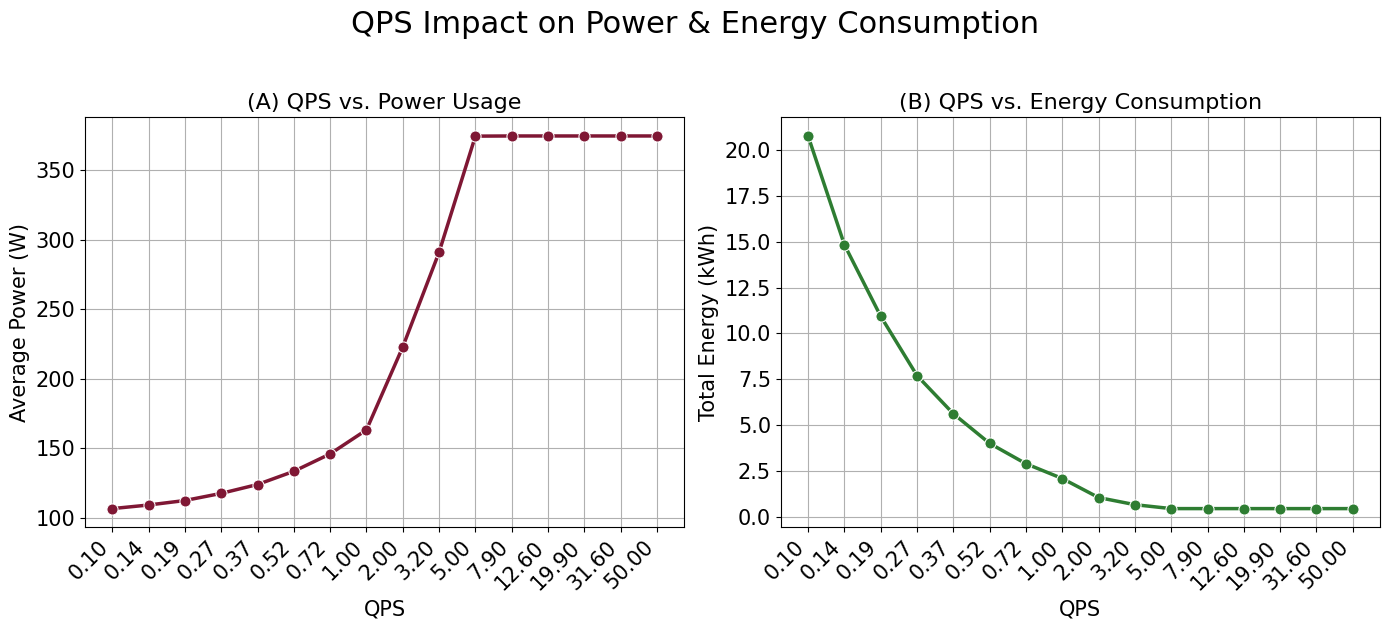


✅ Figure saved to: /Users/mirayozcan/Desktop/vidur_copy/vidur/experiments-final/analysis/exp4-qps_combined_power_energy_evenly_spaced.png


In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sort data by QPS
df = df.sort_values(by="qps").reset_index(drop=True)
df["qps_index"] = range(1, len(df) + 1)
qps_labels = [f"{x:.2f}" for x in df["qps"]]

# ------------------------------------------------------------------------------
# Shared Font & Style Setup (matches your batch experiment plots)
# ------------------------------------------------------------------------------
plt.rcParams["font.family"] = "DejaVu Sans"  # Or Times New Roman if preferred

title_size = 16
label_size = 15
tick_size = 15
legend_fontsize = 12
suptitle_size = 22

# ------------------------------------------------------------------------------
# Create Figure and Subplots
# ------------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # More horizontal space

# (A) QPS vs. Average Power
sns.lineplot(
    ax=axes[0],
    data=df,
    x="qps_index",
    y="average_power_watts",
    marker="o",
    color="#7F1734",  # Dark purple
    linewidth=2.5,
    markersize=8
)
axes[0].set_title("(A) QPS vs. Power Usage", fontsize=title_size)
axes[0].set_xlabel("QPS", fontsize=label_size)
axes[0].set_ylabel("Average Power (W)", fontsize=label_size)
axes[0].set_xticks(df["qps_index"])
axes[0].set_xticklabels(qps_labels, rotation=45, ha="right", fontsize=tick_size)
axes[0].tick_params(axis="both", labelsize=tick_size)
axes[0].grid(True)

# (B) QPS vs. Total Energy
sns.lineplot(
    ax=axes[1],
    data=df,
    x="qps_index",
    y="total_energy_kwh",
    marker="o",
    color="#2E7D32",  # Dark green
    linewidth=2.5,
    markersize=8
)
axes[1].set_title("(B) QPS vs. Energy Consumption", fontsize=title_size)
axes[1].set_xlabel("QPS", fontsize=label_size)
axes[1].set_ylabel("Total Energy (kWh)", fontsize=label_size)
axes[1].set_xticks(df["qps_index"])
axes[1].set_xticklabels(qps_labels, rotation=45, ha="right", fontsize=tick_size)
axes[1].tick_params(axis="both", labelsize=tick_size)
axes[1].grid(True)

# ------------------------------------------------------------------------------
# Title + Layout
# ------------------------------------------------------------------------------
plt.suptitle("QPS Impact on Power & Energy Consumption", fontsize=suptitle_size, y=1.04)
plt.tight_layout()

# ------------------------------------------------------------------------------
# Save
# ------------------------------------------------------------------------------
output_dir = "/Users/mirayozcan/Desktop/vidur_copy/vidur/experiments-final/analysis"
os.makedirs(output_dir, exist_ok=True)

filename = "exp4-qps_combined_power_energy_evenly_spaced.png"
full_path = os.path.join(output_dir, filename)
plt.savefig(full_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"\n✅ Figure saved to: {full_path}")

In [4]:
# Load the CSV
file_path = "/Users/mirayozcan/Desktop/vidur_copy/vidur/simulator_output/exp4-qps-power-energy/experiment_results_summary.csv"
df = pd.read_csv(file_path)

# Sort by QPS
df = df.sort_values(by="qps")

# Create an artificial x-axis index (1, 2, 3, ...), preserving order
df["qps_index"] = range(1, len(df) + 1)

# Define tick labels: show actual QPS values at these index positions
qps_labels = [f"{x:.2f}" for x in df["qps"]]

# Create interactive figure with 2 subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=[
        "QPS vs. Power Usage",
        "QPS vs. Energy Consumption"
    ]
)

###############################################################################
# (A) QPS vs. Power Usage (Evenly Spaced QPS)
###############################################################################
hover_text_a = [
    f"Num Requests: {nr}<br>"
    f"QPS: {qps}<br>"
    f"Avg Power: {power:.2f} W<br>"
    f"Total Energy: {energy:.3f} kWh<br>"
    f"Execution Time: {time:.2f} s"
    for nr, qps, power, energy, time in zip(
        df["num_requests"], df["qps"], df["average_power_watts"],
        df["total_energy_kwh"], df["execution_time_s"]
    )
]

fig.add_trace(
    go.Scatter(
        x=df["qps_index"],
        y=df["average_power_watts"],
        mode="lines+markers",
        name="Average Power",
        marker=dict(size=8, color="purple"),
        line=dict(color="purple"),
        hoverinfo="text",
        hovertext=hover_text_a
    ),
    row=1, col=1
)

###############################################################################
# (B) QPS vs. Energy Consumption (Evenly Spaced QPS)
###############################################################################
hover_text_b = [
    f"Num Requests: {nr}<br>"
    f"QPS: {qps}<br>"
    f"Avg Power: {power:.2f} W<br>"
    f"Total Energy: {energy:.3f} kWh<br>"
    f"Execution Time: {time:.2f} s"
    for nr, qps, power, energy, time in zip(
        df["num_requests"], df["qps"], df["average_power_watts"],
        df["total_energy_kwh"], df["execution_time_s"]
    )
]

fig.add_trace(
    go.Scatter(
        x=df["qps_index"],
        y=df["total_energy_kwh"],
        mode="lines+markers",
        name="Total Energy",
        marker=dict(size=8, color="red"),
        line=dict(color="red"),
        hoverinfo="text",
        hovertext=hover_text_b
    ),
    row=1, col=2
)

###############################################################################
# Apply evenly spaced QPS values but label with actual QPS
###############################################################################
for i in range(1, 3):
    fig.update_xaxes(
        tickvals=df["qps_index"],
        ticktext=qps_labels,
        title_text="QPS",
        row=1, col=i
    )

###############################################################################
# Y-axis labels
###############################################################################
fig.update_yaxes(title_text="Average Power (W)", row=1, col=1)
fig.update_yaxes(title_text="Total Energy (kWh)", row=1, col=2)

###############################################################################
# Layout and styling
###############################################################################
fig.update_layout(
    title_text="Impact of QPS on Power Usage and Energy Consumption",
    title_x=0.5,
    width=1000, height=500,
    hovermode="x unified",
    margin=dict(l=50, r=50, t=80, b=50)
)

# Show interactive plot
fig.show()

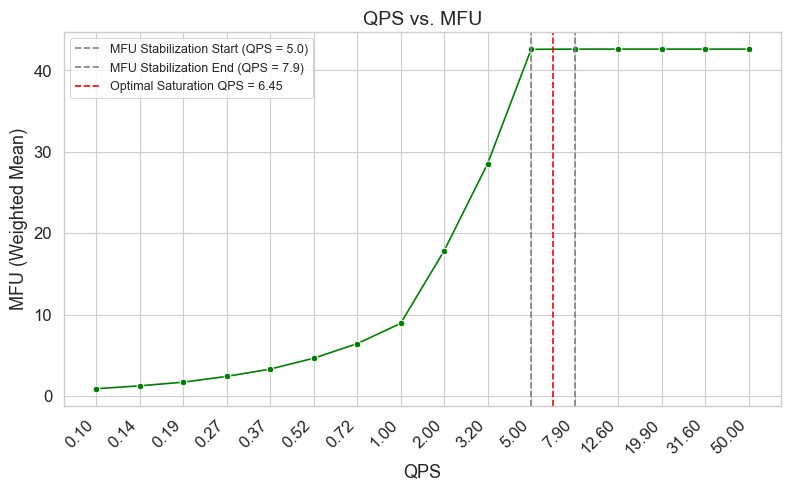


✅ Figure saved to: /Users/mirayozcan/Desktop/vidur_copy/vidur/experiments-final/analysis/exp4-qps_vs_mfu_evenly_spaced_precise_lines.png


In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set visual style
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.0)

# Sort data and create artificial x-axis
df = df.sort_values(by="qps").reset_index(drop=True)
df["qps_index"] = range(1, len(df) + 1)
qps_labels = [f"{x:.2f}" for x in df["qps"]]

# Define QPS reference points
qps_start = 5.0
qps_end = 7.9
qps_optimal = 6.45

# Interpolate qps_index for each line (ensures exact placement)
index_start = np.interp(qps_start, df["qps"], df["qps_index"])
index_end = np.interp(qps_end, df["qps"], df["qps_index"])
index_optimal = np.interp(qps_optimal, df["qps"], df["qps_index"])

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# MFU line
sns.lineplot(
    ax=ax,
    data=df,
    x="qps_index",
    y="mfu_weighted_mean",
    marker="o",
    color="green"
)

# Vertical lines with precise positioning
ax.axvline(x=index_start, linestyle="--", color="gray", label=f"MFU Stabilization Start (QPS = {qps_start})")
ax.axvline(x=index_end, linestyle="--", color="gray", label=f"MFU Stabilization End (QPS = {qps_end})")
ax.axvline(x=index_optimal, linestyle="--", color="red", label=f"Optimal Saturation QPS = {qps_optimal}")

# X-axis formatting
ax.set_xlabel("QPS", fontsize=13)
ax.set_ylabel("MFU (Weighted Mean)", fontsize=13)
ax.set_title("QPS vs. MFU", fontsize=14)

# Tick font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.set_xticks(df["qps_index"])
ax.set_xticklabels(qps_labels, rotation=45, ha="right", fontsize=12)

# Legend
ax.legend(loc="upper left", fontsize=9)
plt.tight_layout()

# Save figure
output_dir = "/Users/mirayozcan/Desktop/vidur_copy/vidur/experiments-final/analysis"
os.makedirs(output_dir, exist_ok=True)
filename = "exp4-qps_vs_mfu_evenly_spaced_precise_lines.png"
plt.savefig(os.path.join(output_dir, filename), dpi=300, bbox_inches="tight")
plt.show()

print(f"\n✅ Figure saved to: {os.path.join(output_dir, filename)}")